## import basic packages 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
# Change the style of plot
plt.style.use('seaborn-darkgrid')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
save_folder = "../figures/letter/"
os.path.isdir(save_folder)

True

# Understanding the dataset

## read the dataset

In [3]:
filename = '../datasets/letter-recognition.csv'
df = pd.read_csv(filename)

## Features

1. lettr capital letter (26 values from A to Z)
2. x-box horizontal position of box (integer)
3. y-box vertical position of box (integer)
4. width width of box (integer)
5. high height of box (integer)
6. onpix total # on pixels (integer)
7. x-bar mean x of on pixels in box (integer)
8. y-bar mean y of on pixels in box (integer)
9. x2bar mean x variance (integer)
10. y2bar mean y variance (integer)
11. xybar mean x y correlation (integer)
12. x2ybr mean of x * x * y (integer)
13. xy2br mean of x * y * y (integer)
14. x-ege mean edge count left to right (integer)
15. xegvy correlation of x-ege with y (integer)
16. y-ege mean edge count bottom to top (integer)
17. yegvx correlation of y-ege with x (integer)

In [4]:
print("number of missing values per feature",df.isnull().sum())

number of missing values per feature letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64


In [5]:
#Check if there is a duplicate row 
print("number of duplicate row: ",df.duplicated().sum())

number of duplicate row:  1332


In [6]:
#remove duplicates 
df=df.drop_duplicates(keep="first")

In [7]:
print("length of the dataset : ", df.shape[0])
print("number of features : ", df.shape[1])

length of the dataset :  18668
number of features :  17


In [8]:
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [9]:
#replace letters to numbers from 0 to 25
df2numbers = df.copy()
#you can alse use pd.replace 
letters = list(np.sort(df['letter'].unique()))
numbers = list(np.arange(0,26))
for letter, number in zip(letters, numbers):
    df2numbers.replace(letter,number,inplace=True)
df2numbers.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,19,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,8,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,3,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,13,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,6,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [10]:
target_col = ["letter"]
print("The target variable is :  ", target_col)

The target variable is :   ['letter']


In [12]:
# sns.pairplot(df,hue='letter')
# fig.savefig(save_folder+"pairplot.png")

In [13]:
df_corr = df2numbers.corr().transpose()

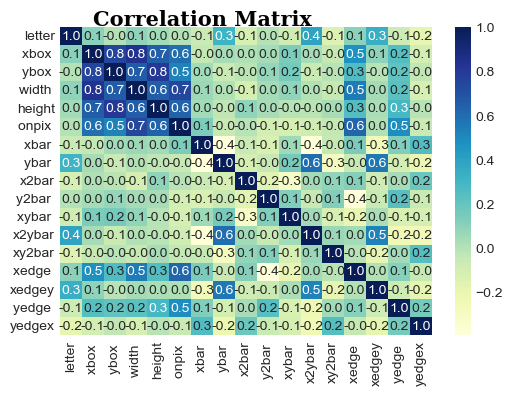

In [19]:

fig = plt.figure(figsize=(6,4))
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])

color_palette = ["#5833ff","#da8829"]
# mask = np.triu(np.ones_like(df_corr))
ax0.text(1.5,-0.1,"Correlation Matrix",fontsize=15, fontweight='bold', fontfamily='serif', color="#000000")
correlation= sns.heatmap(df_corr,fmt=".1f",annot=True,cmap='YlGnBu')
fig = correlation.get_figure()
fig.savefig(save_folder+"Correlation_full_anot.png")
plt.show()

In [20]:
df_corr_output = df_corr.iloc[:,-1]
print("correlations between features and hear attach: ",df_corr_output)

correlations between features and hear attach:  letter   -0.184479
xbox     -0.097928
ybox     -0.031288
width    -0.111611
height   -0.006940
onpix    -0.053799
xbar      0.258355
ybar     -0.211369
x2bar     0.185946
y2bar    -0.061613
xybar    -0.108670
x2ybar   -0.242875
xy2bar    0.243253
xedge    -0.045856
xedgey   -0.185969
yedge     0.150748
yedgex    1.000000
Name: yedgex, dtype: float64


In [21]:
df_corr[['letter']].transpose()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
letter,1.0,0.105646,-0.000023,0.093698,0.041871,0.000835,-0.055585,0.311597,-0.11398,0.000437,-0.081157,0.387574,-0.141832,0.096098,0.336402,-0.068714,-0.184479


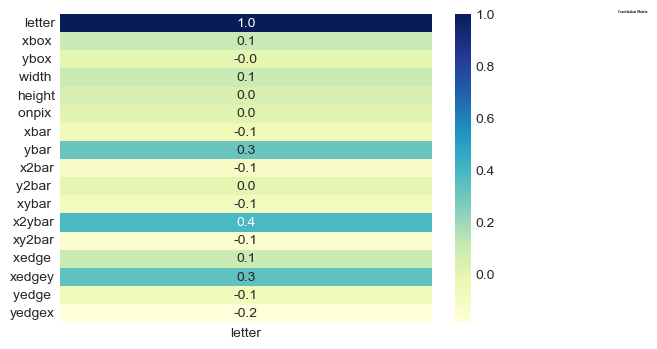

In [22]:
fig = plt.figure(figsize=(6,4))
# gs = fig.add_gridspec(1,1)
# gs.update(wspace=0.3, hspace=0.1)
ax0 = fig.add_subplot(gs[0,0])

color_palette = ["#5833ff","#da8829"]
# mask = np.triu(np.ones_like(df_corr))
ax0.text(1.5,-0.1,"Correlation Matrix",fontsize=2, fontweight='bold', fontfamily='serif', color="#000000")
correlation_reduced = sns.heatmap(df_corr[['letter']],fmt=".1f",annot=True,cmap='YlGnBu')
fig = correlation_reduced.get_figure()
fig.savefig(save_folder+"Correlation_reduced.png")

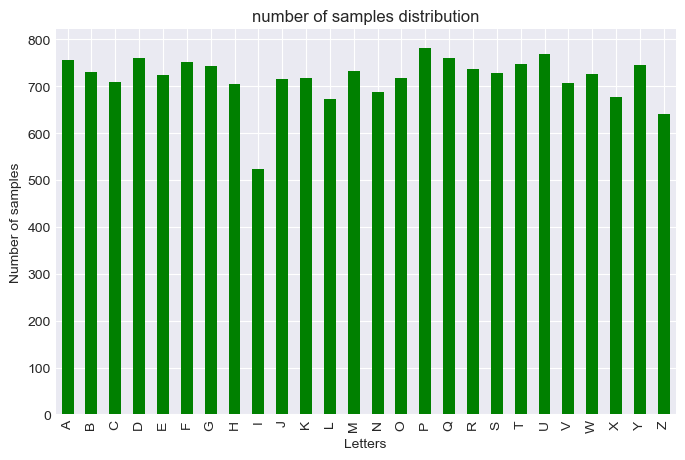

In [24]:
fig, ax = plt.subplots(figsize=(8,5))
df.iloc[:,0].value_counts().sort_index().plot(ax=ax, kind='bar', title = "number of samples distribution",color='green')
plt.xlabel("Letters")
plt.ylabel("Number of samples")
# plt.savefig(outputFolder+ "Class Distribution - LC.png")
plt.show()
# plt.close()

# preprocessing: preparing the data

In [25]:
# Scaling
from sklearn.preprocessing import RobustScaler, StandardScaler

# Train Test Split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve

# Models
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve,confusion_matrix

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [26]:
# creating a copy of df
df1_copy = df

# seperate features with target
X = df1_copy.drop(['letter'],axis=1)
y = df1_copy[['letter']]

# instantiating the scaler
scaler = RobustScaler()
# scaler = StandardScaler()

# scaling the continuous featuree
X = scaler.fit_transform(X)

In [28]:
#separate data for testing and training 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 102)
y_train = y_train.squeeze(1)
y_test = y_test.squeeze(1)
print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

The shape of X_train is       (14934, 16)
The shape of X_test is        (3734, 16)
The shape of y_train is       (14934,)
The shape of y_test is        (3734,)


In [22]:
#separate data for testing and training 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
y_train = y_train.squeeze(1)
y_test = y_test.squeeze(1)
print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

The shape of X_train is       (241, 22)
The shape of X_test is        (61, 22)
The shape of y_train is       (241,)
The shape of y_test is        (61,)


## Neural networks

In [ ]:
param_grid = [
        {
            'activation' : ['identity', 'logistic', 'tanh', 'relu'],
            'solver' : ['lbfgs', 'sgd', 'adam'],
            'max_iter': [1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000 ],
            'hidden_layer_sizes': [(10,),(30,),(100,),(200,),(5,5),(5,10),(10,20),(20,30),(30,40),(40,50),(100,100),(200,200),(100,100,100)],
            'alpha': 10.0 ** -np.arange(1, 5),
            'random_state':[102,7,88,91]
        }
       ]
clf = GridSearchCV(MLPClassifier(), param_grid, cv=10,
                           scoring='accuracy',n_jobs=-1)
# clf = MLPClassifier(solver='adam', learning_rate_init=1e-3,hidden_layer_sizes=(50, ), random_state=102)
clf.fit(X_train,y_train)

print("Best parameters set found on development set:")
print(clf.best_params_)


In [ ]:
# clf.best_score_

In [85]:
clf = MLPClassifier(solver='adam', alpha=0.1,learning_rate_init=1e-3,hidden_layer_sizes=(200,200 ),activation='relu', random_state=7,max_iter=1000)
%timeit clf.fit(X_train,y_train)
# predicting the values
%timeit y_pred = clf.predict(X_test)

964 ms ± 23.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.11 ms ± 16.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


0.8278142076502732
0.9
0.042830655472742764


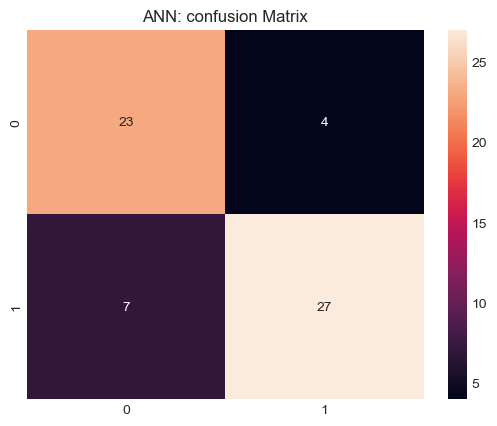

In [45]:
clf = MLPClassifier(solver='adam', alpha=0.1,learning_rate_init=1e-3,hidden_layer_sizes=(200,200 ),activation='relu', random_state=7,max_iter=1000)
clf.fit(X_train,y_train)cd

y_pred = clf.predict(X_test)
# printing the test accuracy
# print("The test accuracy score of Neural Net is ", accuracy_score(y_test, y_pred))

# print("number of patients that had heart attach cases in the test dataset: ",len(np.where(y_test==1)[0]))
# print("number of patients that didn't had  cases in the test dataset: ",len(np.where(y_test==0)[0]))
confusion = sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
confusion.set_title("ANN: confusion Matrix")
fig = confusion.get_figure()
fig.savefig(save_folder+"ANN_confusion.png")
cv_result = cross_val_score(clf,X,y.squeeze(1)) # uses R^2 as score 
print(cv_result.mean())
print(cv_result.max())
print(cv_result.std())

In [23]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(0.01, 1.0, 15)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure(figsize=(6,4))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, shuffle=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
#     plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<IPython.core.display.Javascript object>


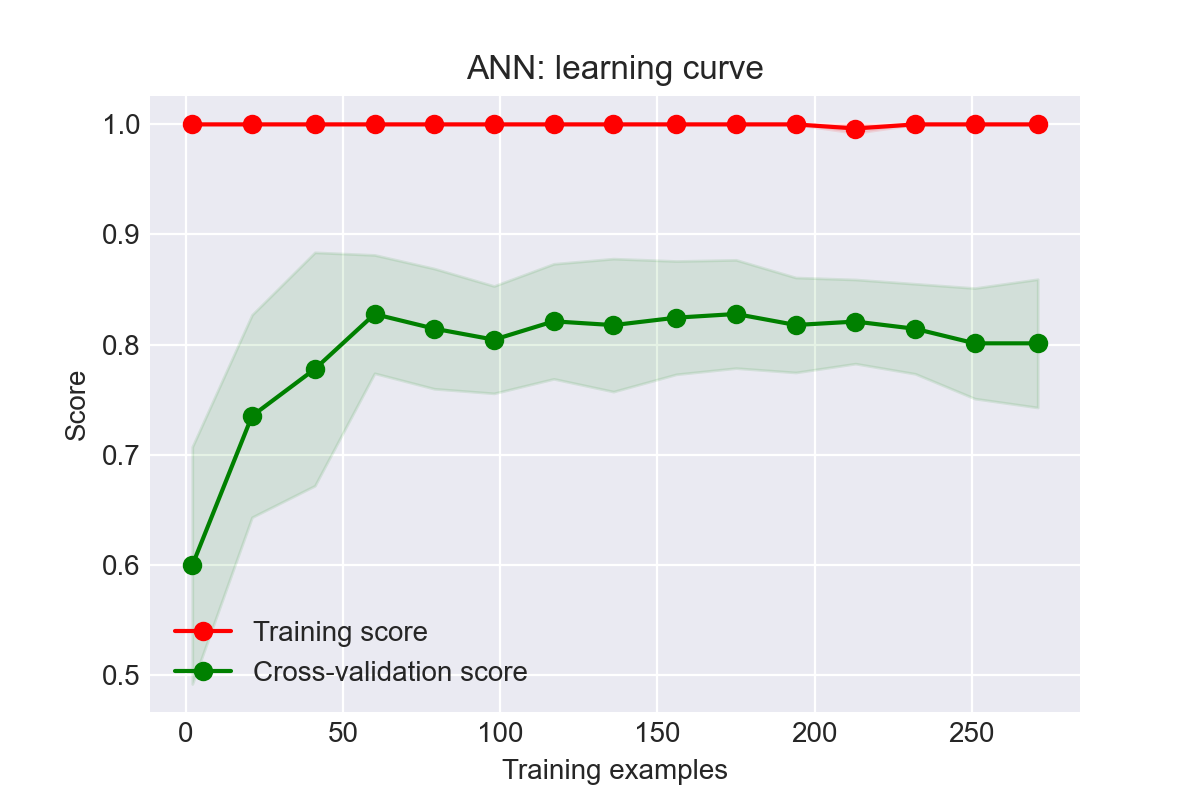

In [74]:
clf2 = MLPClassifier(solver='adam', alpha=0.1,learning_rate_init=1e-3,hidden_layer_sizes=(200,200 ),activation='relu', random_state=7,max_iter=1000)
title = 'ANN: learning curve'
plt = plot_learning_curve(clf2,title,X,y.squeeze(1),cv=10,n_jobs=-1)
plt.savefig(save_folder+ "ANN_learning_curve.png")
plt.show()


In [75]:
iterations = list(np.arange(1,300,10))
solvers = ['lbfgs', 'sgd', 'adam']
# mlp_train, mlp_test = np.zeros(len(iterations)), np.zeros(len(iterations))
cv_mean, cv_std = np.zeros((len(solvers),len(iterations))), np.zeros((len(solvers),len(iterations)))
for i,solver in enumerate(solvers):
    for j,iteration in enumerate(iterations):
        clf = MLPClassifier(solver=solver, alpha=0.1,learning_rate_init=1e-3,hidden_layer_sizes=(200,200 ),activation='relu', random_state=7,max_iter=iteration)
    #     clf2 = clf2.fit(X_train, y_train)
    #     mlp_train[count] = clf2.score(X_train, y_train)*100
    #     mlp_test[count] =  clf2.score(X_test,y_test)*100
        cv_result = cross_val_score(clf,X,y.squeeze(1)) # uses R^2 as score 
        cv_mean[i,j] = round(cv_result.mean()*100,1)
        cv_std[i,j] = round(cv_result.std(),1)
        
                                                                    

# plt.savefig(outputFolder + dataSet + " Score vs. Epochs.png")
# plt.clf()
# plt.close()

<IPython.core.display.Javascript object>


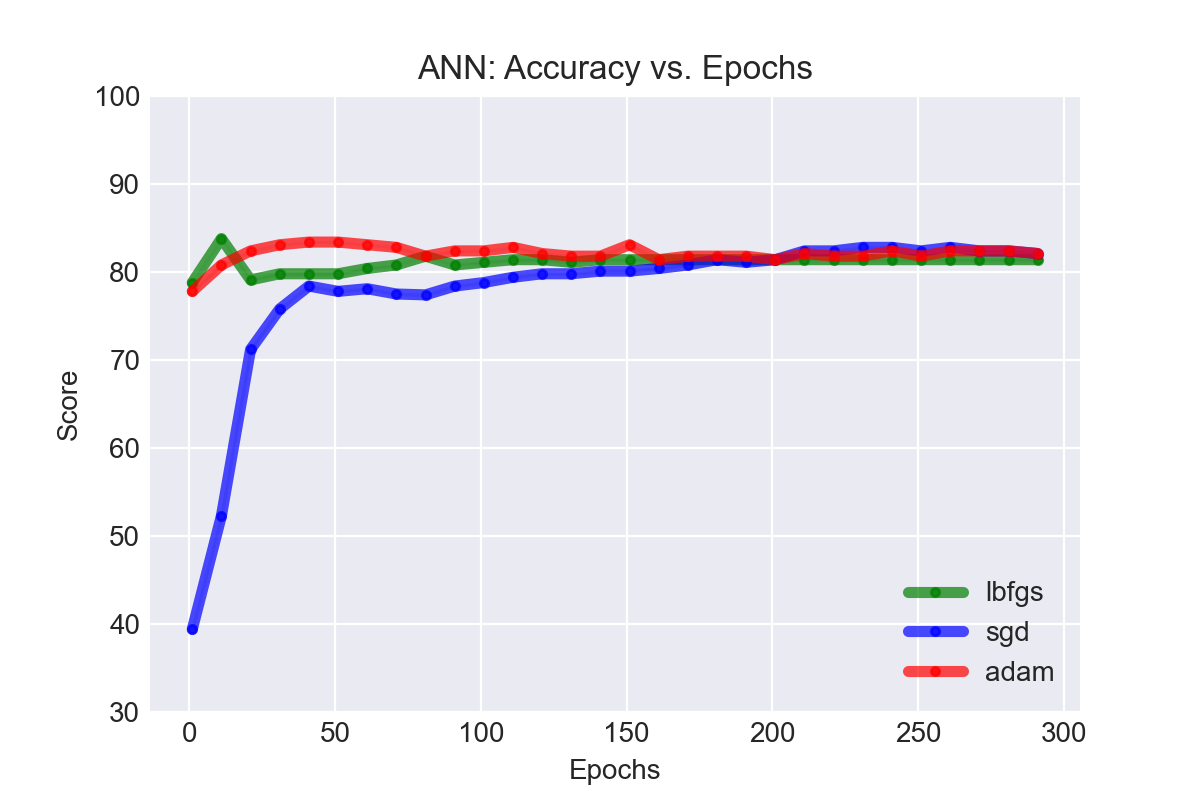

In [76]:
plt.figure(figsize=(6,4))
plt.plot(iterations, cv_mean[0], marker='.', color='green', linewidth=4, alpha=0.7, label="lbfgs")
plt.fill_between(iterations,cv_mean[0]-cv_std[0],cv_mean[0]+cv_std[0],alpha=0.1, color="g")
plt.plot(iterations, cv_mean[1], marker='.', color='blue', linewidth=4, alpha=0.7, label="sgd")
plt.fill_between(iterations,cv_mean[1]-cv_std[1],cv_mean[1]+cv_std[1],alpha=0.1, color="b")
plt.plot(iterations, cv_mean[2], marker='.', color='red', linewidth=4, alpha=0.7, label="adam")
plt.fill_between(iterations,cv_mean[2]-cv_std[2],cv_mean[2]+cv_std[2],alpha=0.1, color="r")
plt.legend(loc='lower right')
ax = plt.gca()
ax.set_ylim([30, 100])
plt.xlabel("Epochs")
plt.ylabel("Score")
plt.title("ANN: Accuracy vs. Epochs")
plt.show()
plt.savefig(save_folder+ "ANN  Accuracy vs. Epochs.png")

In [24]:
lrs = [1e-5,1e-4,1e-3,1e-2,1e-1,1.0]
lrs.reverse()
slovers = ['lbfgs', 'sgd', 'adam']
# mlp_test_lr = np.zeros((len(slovers),len(lrs)))
cv_mean = np.zeros((len(slovers),len(lrs)))
cv_std = np.zeros((len(slovers),len(lrs)))
for i,solver in enumerate(slovers):
    for j, lr in enumerate(lrs):
        clf = MLPClassifier(solver=solver, alpha=0.1,learning_rate_init=lr,hidden_layer_sizes=(200,200 ),activation='relu', random_state=7,max_iter=300)
#         clf2 = clf2.fit(X_train, y_train)
#         mlp_test_lr[i,j] =  clf2.score(X_test,y_test)*100
        cv_result = cross_val_score(clf,X,y.squeeze(1)) # uses R^2 as score
        cv_mean[i,j] = round(cv_result.mean()*100,1)
        cv_std[i,j] = round(cv_result.std()*100,1)


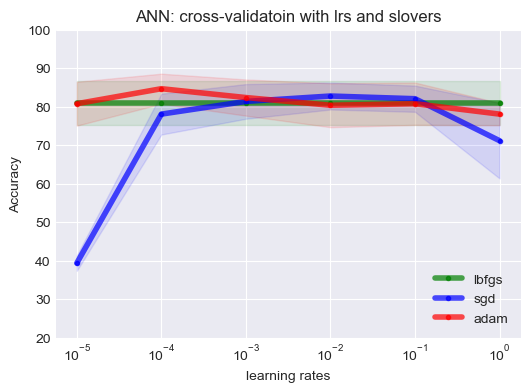

<Figure size 640x480 with 0 Axes>

In [25]:
plt.figure(figsize=(6,4))
plt.plot(lrs, cv_mean[0], marker='.', color='green', linewidth=4, alpha=0.7, label="lbfgs")
plt.fill_between(lrs,cv_mean[0]-cv_std[0],cv_mean[0]+cv_std[0],alpha=0.1, color="g")
plt.plot(lrs, cv_mean[1], marker='.', color='blue', linewidth=4, alpha=0.7, label="sgd")
plt.fill_between(lrs,cv_mean[1]-cv_std[1],cv_mean[1]+cv_std[1],alpha=0.1, color="b")
plt.plot(lrs, cv_mean[2], marker='.', color='red', linewidth=4, alpha=0.7, label="adam")
plt.fill_between(lrs,cv_mean[2]-cv_std[2],cv_mean[2]+cv_std[2],alpha=0.1, color="r")

plt.legend(loc='lower right')
ax = plt.gca()
ax.set_ylim([20, 100])
ax.set_xscale('log')
plt.xlabel("learning rates")
plt.ylabel("Accuracy")
plt.title("ANN: cross-validatoin with lrs and slovers")
plt.show()
plt.savefig(save_folder+ "ANN cross validatoin with lrs and slovers.png")

## SVM

In [85]:
# param_grid = {'C': [0.1, 1, 10, 100, 1000], 
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#               'kernel': ['linear', 'poly', 'rbf'],
#              'degree':[1,2,3,5,6],
#               'random_state':[102,7,88,91]
#              } 
# grid_svm = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,cv=6,
#                            scoring='accuracy',n_jobs=-1)
  
# # fitting the model for grid search
# grid_svm.fit(X_train, y_train.squeeze(1))
# print("Best parameters set found on development set:")
# print(grid_svm.best_params_)

In [87]:
# grid_svm.best_score_

In [86]:
svm =SVC(C=0.1,degree=1,gamma=0.1, kernel="linear",random_state=102)
%timeit svm.fit(X_train,y_train)
# predicting the values
%timeit svm.predict(X_test)


2.02 ms ± 60.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
947 µs ± 17.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


The test accuracy score of SVM is  0.819672131147541
number of patients that had heart attach cases in the test dataset:  34
number of patients that didn't had  cases in the test dataset:  27
[0.7704918  0.90163934 0.78333333 0.8        0.8       ]
0.8110928961748634
0.9016393442622951
0.046612886685677896


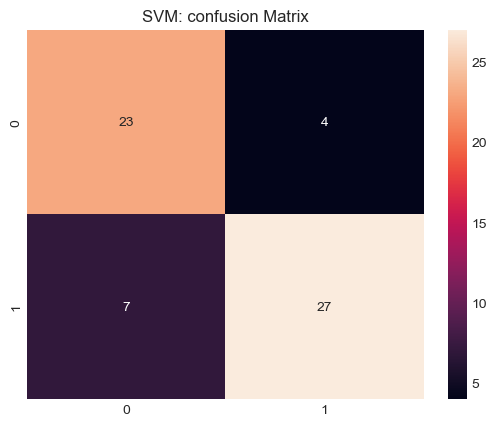

In [26]:
svm =SVC(C=0.1,degree=1,gamma=0.1, kernel="linear",random_state=102)
svm.fit(X_train,y_train)
# predicting the values
y_pred = svm.predict(X_test)

# printing the test accuracy
print("The test accuracy score of SVM is ", accuracy_score(y_test, y_pred))

print("number of patients that had heart attach cases in the test dataset: ",len(np.where(y_test==1)[0]))
print("number of patients that didn't had  cases in the test dataset: ",len(np.where(y_test==0)[0]))
confusion = sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
confusion.set_title("SVM: confusion Matrix")
fig = confusion.get_figure()
fig.savefig(save_folder+"SVM_confusion.png")
cv_result = cross_val_score(svm,X,y.squeeze(1),cv=5) # uses R^2 as score 
print(cv_result)
print(cv_result.mean())
print(cv_result.max())
print(cv_result.std())

<IPython.core.display.Javascript object>


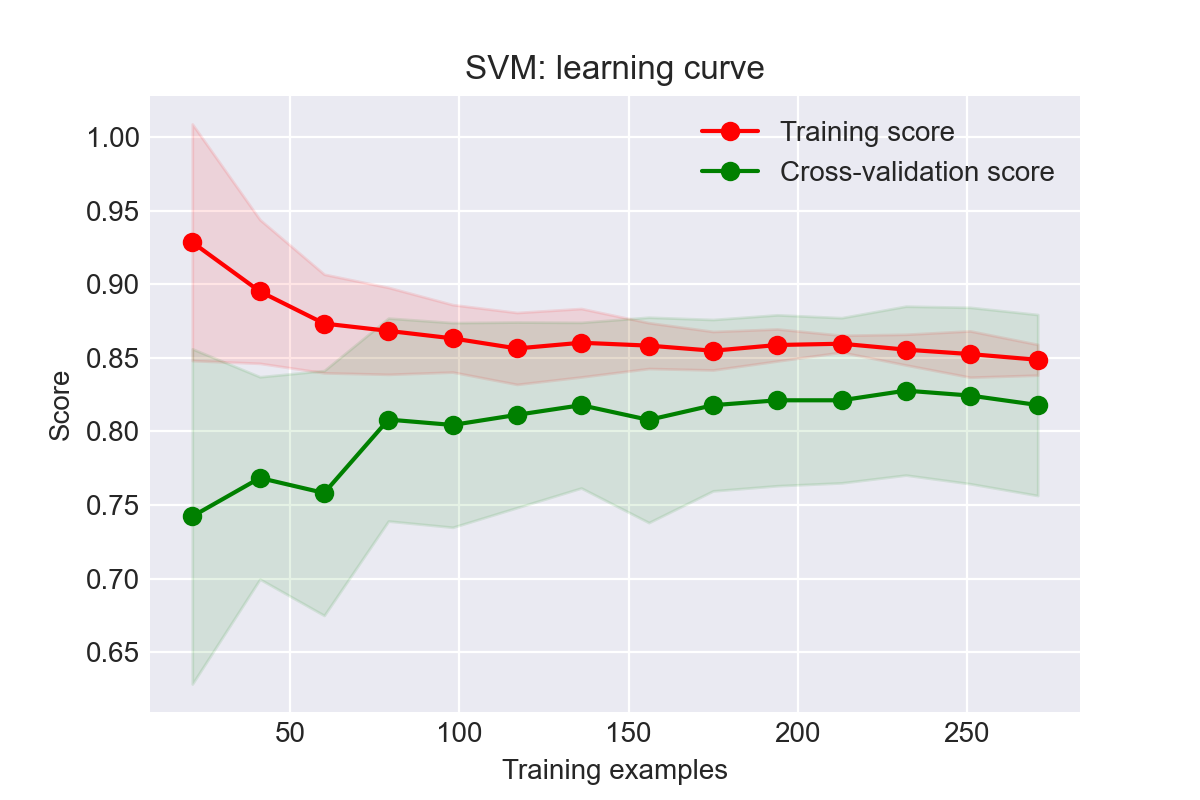

In [88]:
svm =SVC(C=0.1,gamma=0.1, kernel="linear",random_state=102)
title = 'SVM: learning curve'
plot_learning_curve(svm,title,X,y.squeeze(1),cv=10,n_jobs=-1)
plt.show()
plt.savefig(save_folder+ "SVM learning curve.png")

In [89]:
# test_acc_svm_c = []
# train_acc_svm_c = []
Cs = [0.00001,0.0001,0.001,0.01,0.1,1.0,10.0,100,1000]
kernals = ['poly','sigmoid','rbf']
cv_mean = np.zeros((len(kernals),len(Cs)))
cv_std = np.zeros((len(kernals),len(Cs)))
for i,kernal in enumerate(kernals):
    for j,C in enumerate(Cs):
        svm =SVC(C=C,degree=1,gamma=0.1, kernel=kernal,random_state=102)
        cv_result = cross_val_score(svm,X,y.squeeze(1)) # uses R^2 as score
        cv_mean[i,j] = round(cv_result.mean()*100,1)
        cv_std[i,j] = round(cv_result.std()*100,1)
    
#     svm.fit(X_train,y_train.squeeze(1))
#     # predicting the values
#     y_pred_train = svm.predict(X_train)
#     y_pred = svm.predict(X_test)
#     # printing the test accuracy
#     accuracy_train = accuracy_score(y_train, y_pred_train)
#     accuracy_test = accuracy_score(y_test, y_pred)
#     train_acc_svm_c.append(round(100*accuracy_train,0))
#     test_acc_svm_c.append(round(100*accuracy_test,0))

# print("samples used: ",Cs)
# print("The train accuracies score of SVM is ", train_acc_svm_c)
# print("The test accuracies score of SVM is ", test_acc_svm_c)

<IPython.core.display.Javascript object>


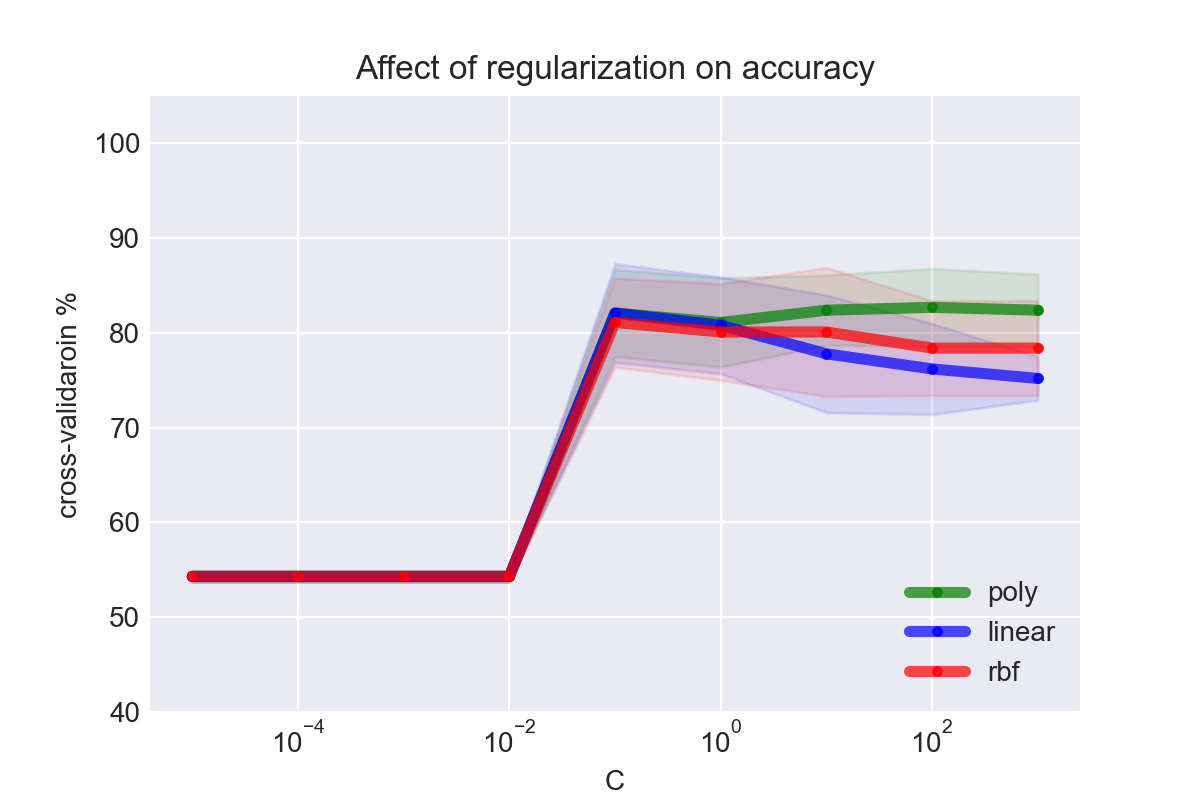

In [90]:
plt.figure(figsize=(6,4))
plt.plot(Cs, cv_mean[0], marker='.', color='green', linewidth=4, alpha=0.7, label="poly")
plt.fill_between(Cs,cv_mean[0]-cv_std[0],cv_mean[0]+cv_std[0],alpha=0.1, color="g")
plt.plot(Cs, cv_mean[1], marker='.', color='blue', linewidth=4, alpha=0.7, label="linear")
plt.fill_between(Cs,cv_mean[1]-cv_std[1],cv_mean[1]+cv_std[1],alpha=0.1, color="b")
plt.plot(Cs, cv_mean[2], marker='.', color='red', linewidth=4, alpha=0.7, label="rbf")
plt.fill_between(Cs,cv_mean[2]-cv_std[2],cv_mean[2]+cv_std[2],alpha=0.1, color="r")


plt.title("Affect of regularization on accuracy")
ax = plt.gca()
ax.set_ylim([40, 105])
ax.set_xscale('log')

# plt.plot(Cs,test_acc_svm_c,label='testing accuracy',color='blue',marker='o', linewidth=2, alpha=0.7)
plt.legend(loc='lower right')
plt.xlabel('C')
plt.ylabel('cross-validaroin %')
plt.show()
plt.savefig(save_folder+ "SVM regularization.png")

In [27]:
gammas = [0.001,0.01,0.1,1.0,10.0,100]
kernals = ['poly','sigmoid','rbf']
# test_acc_svm_gamma = np.zeros((len(kernals),len(gammas)))
# train_acc_svm_gamma = np.zeros((len(kernals),len(gammas)))
cv_mean = np.zeros((len(kernals),len(gammas)))
cv_std = np.zeros((len(kernals),len(gammas)))
for i,kernal in enumerate(kernals):
    for j,gamma in enumerate(gammas):
        svm =SVC(C=0.1,degree=1,gamma=gamma, kernel=kernal,random_state=102)
        cv_result = cross_val_score(svm,X,y.squeeze(1)) # uses R^2 as score
        cv_mean[i,j] = round(cv_result.mean()*100,1)
        cv_std[i,j] = round(cv_result.std()*100,1)
    
#         svm.fit(X_train,y_train.squeeze(1))
#         # predicting the values
#         y_pred_train = svm.predict(X_train)
#         y_pred = svm.predict(X_test)
#         # printing the test accuracy
#         accuracy_train = accuracy_score(y_train, y_pred_train)
#         accuracy_test = accuracy_score(y_test, y_pred)
#         train_acc_svm_gamma[i,j] = round(100*accuracy_train,0)
#         test_acc_svm_gamma[i,j] =round(100*accuracy_test,0)

# print("samples used: ",gammas)
# print("The train accuracies score of SVM is ", train_acc_svm_gamma)
# print("The test accuracies score of SVM  is ", test_acc_svm_gamma)

In [28]:
cv_mean

array([[54.3, 54.3, 82.1, 81.1, 82.4, 82.7],
       [54.3, 54.3, 82.1, 77.4, 69.9, 70.5],
       [54.3, 54.3, 81.1, 54.3, 54.3, 54.3]])

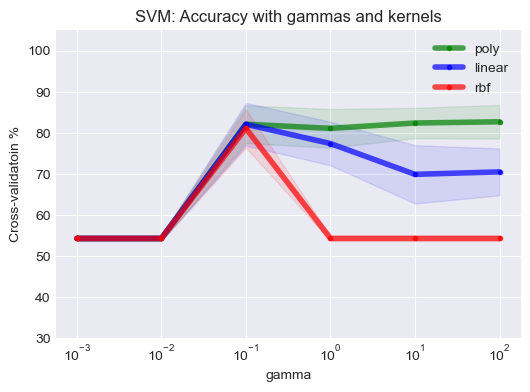

In [31]:
plt.figure(figsize=(6,4))
plt.plot(gammas, cv_mean[0], marker='.', color='green', linewidth=4, alpha=0.7, label="poly")
plt.fill_between(gammas,cv_mean[0]-cv_std[0],cv_mean[0]+cv_std[0],alpha=0.1, color="g")
plt.plot(gammas, cv_mean[1], marker='.', color='blue', linewidth=4, alpha=0.7, label="linear")
plt.fill_between(gammas,cv_mean[1]-cv_std[1],cv_mean[1]+cv_std[1],alpha=0.1, color="b")
plt.plot(gammas, cv_mean[2], marker='.', color='red', linewidth=4, alpha=0.7, label="rbf")
plt.fill_between(gammas,cv_mean[2]-cv_std[2],cv_mean[2]+cv_std[2],alpha=0.1, color="r")


plt.legend(loc='best')
ax = plt.gca()
ax.set_ylim([30, 105])
ax.set_xscale('log')
plt.xlabel("gamma")
plt.ylabel("Cross-validatoin %")
plt.title("SVM: Accuracy with gammas and kernels")
# plt.show()
plt.savefig(save_folder+ "SVM gammas and kernels.png")

##  Decision Tree

In [129]:
# param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
#               'ccp_alpha': [0.1, .01, .001],
#               'max_depth' : np.arange(2,20,2),
#               'criterion' :['gini', 'entropy'],
#               'random_state':[102,7,88,91]
#              }
# grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid, refit = True, verbose = 3,cv=6,
#                            scoring='accuracy',n_jobs=-1)
  
# # fitting the model for grid search
# grid_dt.fit(X_train, y_train)

In [130]:
# print("Best parameters set found on development set:")
# print(grid_dt.best_params_)
# print(grid_dt.best_score_)

In [131]:
dt =DecisionTreeClassifier(ccp_alpha= 0.01,criterion='log_loss',max_depth=8,max_features='sqrt',random_state=102)
%timeit dt.fit(X_train,y_train)


# predicting the values
%timeit y_pred = dt.predict(X_test)

1.32 ms ± 19.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
748 µs ± 12.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


The train accuracy score of DT is  0.8755186721991701
The test accuracy score of DT is  0.7049180327868853
0.7082513661202186
0.7868852459016393
0.053784040231896674


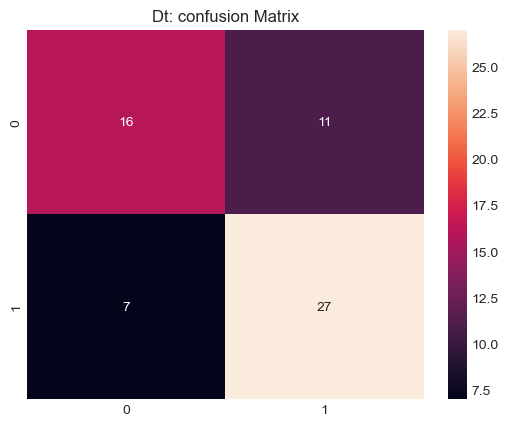

In [33]:

dt =DecisionTreeClassifier(ccp_alpha= 0.01,criterion='log_loss',max_depth=8,max_features='sqrt',random_state=102)
dt.fit(X_train,y_train)


# predicting the values
y_pred = dt.predict(X_test)
y_pred_train = dt.predict(X_train)
# printing the test accuracy
print("The train accuracy score of DT is ", accuracy_score(y_train, y_pred_train))
print("The test accuracy score of DT is ", accuracy_score(y_test, y_pred))

# print("number of patients that had heart attach cases in the test dataset: ",len(np.where(y_test==1)[0]))
# print("number of patients that didn't had  cases in the test dataset: ",len(np.where(y_test==0)[0]))
confusion = sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
confusion.set_title("Dt: confusion Matrix")
fig1 = confusion.get_figure()
fig1.savefig(save_folder+"DT_confusion.png")

cv_result = cross_val_score(dt,X,y.squeeze(1)) # uses R^2 as score 
print(cv_result.mean())
print(cv_result.max())
print(cv_result.std())

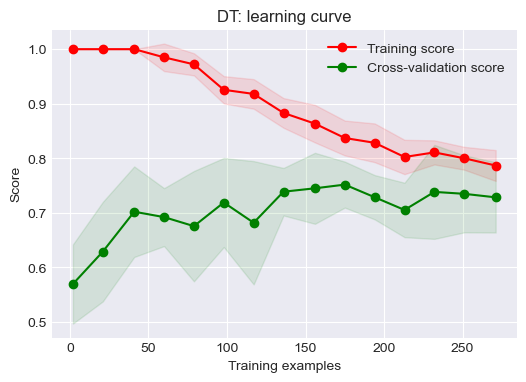

In [35]:
dt =DecisionTreeClassifier(ccp_alpha= 0.01, criterion='gini',max_depth=8,max_features='sqrt',random_state=102)
title = 'DT: learning curve'
plot_learning_curve(dt,title,X,y.squeeze(1),cv=10,n_jobs=-1)
# plt.show()
plt.savefig(save_folder+ "DT learning curve.png")

In [36]:
# test_acc_dt_depth = []
# train_acc_dt_depth = []
criterions = ['gini', 'entropy', 'log_loss']
max_depths = list(np.arange(1,26))
cv_mean = np.zeros((len(criterions),len(max_depths)))
cv_std = np.zeros((len(criterions),len(max_depths)))

for i, criterion in enumerate(criterions):    
    for j,depth in enumerate(max_depths):
        dt =DecisionTreeClassifier(ccp_alpha= 0.01, criterion=criterion,max_depth=depth,max_features='sqrt',random_state=102)
        cv_result = cross_val_score(dt,X,y.squeeze(1)) # uses R^2 as score
        cv_mean[i,j] = round(cv_result.mean()*100,1)
        cv_std[i,j] = round(cv_result.std()*100,1)
#     dt.fit(X_train,y_train.squeeze(1))
#     # predicting the values
#     y_pred_train = dt.predict(X_train)
#     y_pred = dt.predict(X_test)
#     # printing the test accuracy
#     accuracy_train = accuracy_score(y_train, y_pred_train)
#     accuracy_test = accuracy_score(y_test, y_pred)
#     train_acc_dt_depth.append(round(100*accuracy_train,0))
#     test_acc_dt_depth.append(round(100*accuracy_test,0))

# print("samples used: ",max_depths)
# print("The train accuracies score of SVM is ", train_acc_dt_depth)
# print("The test accuracies score of SVM is ", test_acc_dt_depth)

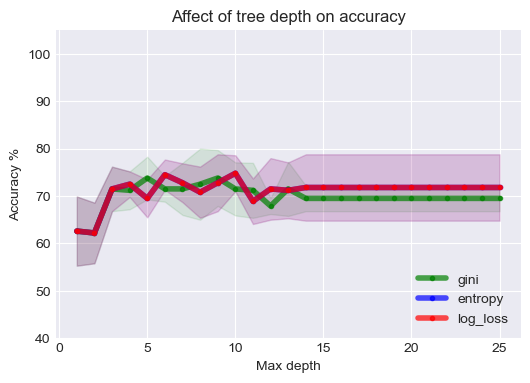

In [38]:
plt.figure(figsize=(6,4))
plt.plot(max_depths, cv_mean[0], marker='.', color='green', linewidth=4, alpha=0.7, label="gini")
plt.fill_between(max_depths,cv_mean[0]-cv_std[0],cv_mean[0]+cv_std[0],alpha=0.1, color="g")
plt.plot(max_depths, cv_mean[1], marker='.', color='blue', linewidth=4, alpha=0.7, label="entropy")
plt.fill_between(max_depths,cv_mean[1]-cv_std[1],cv_mean[1]+cv_std[1],alpha=0.1, color="b")
plt.plot(max_depths, cv_mean[2], marker='.', color='red', linewidth=4, alpha=0.7, label="log_loss")
plt.fill_between(max_depths,cv_mean[2]-cv_std[2],cv_mean[2]+cv_std[2],alpha=0.1, color="r")

plt.title("Affect of tree depth on accuracy")
ax = plt.gca()
ax.set_ylim([40, 105])
# ax.set_xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Max depth')
plt.ylabel('Accuracy %')
# plt.show()
plt.savefig(save_folder+ "DT tree depth.png")

In [39]:
criterions = ['gini', 'entropy', 'log_loss']
leaf_sizes = list(np.arange(2,41))
cv_mean = np.zeros((len(criterions),len(leaf_sizes)))
cv_std = np.zeros((len(criterions),len(leaf_sizes)))

for i, criterion in enumerate(criterions):    
    for j,leaf_size in enumerate(leaf_sizes):
        dt =DecisionTreeClassifier(ccp_alpha= 0.01,max_leaf_nodes=leaf_size, criterion=criterion,max_depth=8,max_features='sqrt',random_state=102)
        cv_result = cross_val_score(dt,X,y.squeeze(1)) # uses R^2 as score
        cv_mean[i,j] = round(cv_result.mean()*100,1)
        cv_std[i,j] = round(cv_result.std()*100,1)
    
    
    
#     dt.fit(X_train,y_train.squeeze(1))
#     # predicting the values
#     y_pred_train = dt.predict(X_train)
#     y_pred = dt.predict(X_test)
#     # printing the test accuracy
#     accuracy_train = accuracy_score(y_train, y_pred_train)
#     accuracy_test = accuracy_score(y_test, y_pred)
#     train_acc_dt_leaf_size.append(round(100*accuracy_train,0))
#     test_acc_dt_leaf_size.append(round(100*accuracy_test,0))

# print("samples used: ",leaf_sizes)
# print("The train accuracies score of SVM is ", train_acc_dt_leaf_size)
# print("The test accuracies score of SVM is ", test_acc_dt_leaf_size)

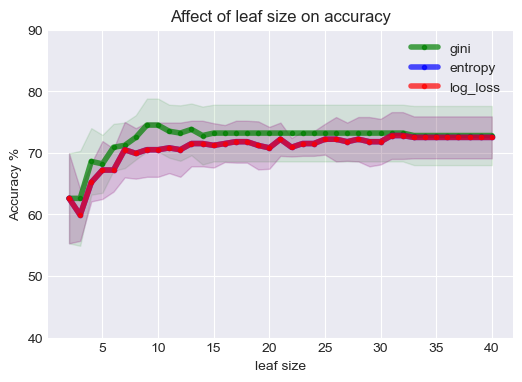

In [40]:
plt.figure(figsize=(6,4))
plt.plot(leaf_sizes, cv_mean[0], marker='.', color='green', linewidth=4, alpha=0.7, label="gini")
plt.fill_between(leaf_sizes,cv_mean[0]-cv_std[0],cv_mean[0]+cv_std[0],alpha=0.1, color="g")
plt.plot(leaf_sizes, cv_mean[1], marker='.', color='blue', linewidth=4, alpha=0.7, label="entropy")
plt.fill_between(leaf_sizes,cv_mean[1]-cv_std[1],cv_mean[1]+cv_std[1],alpha=0.1, color="b")
plt.plot(leaf_sizes, cv_mean[2], marker='.', color='red', linewidth=4, alpha=0.7, label="log_loss")
plt.fill_between(leaf_sizes,cv_mean[2]-cv_std[2],cv_mean[2]+cv_std[2],alpha=0.1, color="r")

plt.title("Affect of leaf size on accuracy")
ax = plt.gca()
ax.set_ylim([40, 90])
# ax.set_xscale('log')
plt.legend(loc='best')
plt.xlabel('leaf size')
plt.ylabel('Accuracy %')
plt.savefig(save_folder+ "DT leaf size.png")
plt.show()


## Boosing

In [96]:
# param_grid = {'learning_rate': [0.1,0.5,1.0,3.0,10.0],
#               'n_estimators': [5, 10, 15,20,35,50,100],
#               'random_state':[102,7,88,91]
#              } 
# grid_boosting = GridSearchCV( AdaBoostClassifier(), param_grid, refit = True, verbose = 3,cv=5,
#                            scoring='accuracy',n_jobs=-1)
  
# # fitting the model for grid search
# grid_boosting.fit(X_train, y_train)
# print("Best parameters set found on development set:")
# print(grid_boosting.best_params_)

In [99]:
# print(grid_boosting.best_params_)
# grid_boosting.best_score_

In [111]:
adabost = AdaBoostClassifier(learning_rate=1.0,n_estimators=25, random_state=102)

%timeit adabost.fit(X_train,y_train)


# predicting the values
%timeit y_pred = adabost.predict(X_test)

23.3 ms ± 232 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
3.23 ms ± 77.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


The train accuracy score of DT is  0.9004149377593361
The test accuracy score of DT is  0.8852459016393442
0.8176502732240438
0.8688524590163934
0.03737305446329466


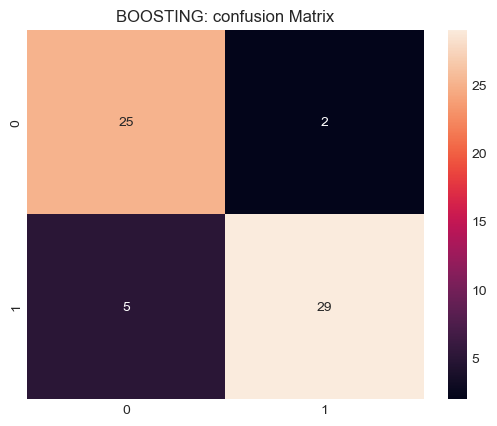

In [41]:
adabost = AdaBoostClassifier(learning_rate=1.0,n_estimators=25, random_state=102)

adabost.fit(X_train,y_train)


# predicting the values
y_pred = adabost.predict(X_test)
y_pred_train = adabost.predict(X_train)
# printing the test accuracy
print("The train accuracy score of DT is ", accuracy_score(y_train, y_pred_train))
print("The test accuracy score of DT is ", accuracy_score(y_test, y_pred))

# print("number of patients that had heart attach cases in the test dataset: ",len(np.where(y_test==1)[0]))
# print("number of patients that didn't had  cases in the test dataset: ",len(np.where(y_test==0)[0]))
confusion = sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
confusion.set_title("BOOSTING: confusion Matrix")
fig = confusion.get_figure()
fig.savefig(save_folder+"Boosting_confusion.png")
cv_result = cross_val_score(adabost,X,y.squeeze(1)) # uses R^2 as score 
print(cv_result.mean())
print(cv_result.max())
print(cv_result.std())

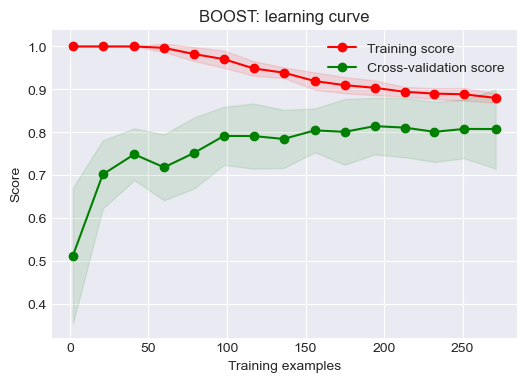

In [43]:
adabost = AdaBoostClassifier(learning_rate=1.0,n_estimators=25, random_state=102)
title = 'BOOST: learning curve'
plot_learning_curve(adabost,title,X,y.squeeze(1),cv=10,n_jobs=-1)
plt.savefig(save_folder+"Boosting learning curve.png")

In [45]:
test_acc_boost_n_est = []
train_acc_boost_n_est = []
n_estimators = list(np.arange(1,100,1))
cv_mean,cv_std = np.zeros(len(n_estimators)),np.zeros(len(n_estimators))
for i,n_estimator in enumerate(n_estimators):
    adabost = AdaBoostClassifier(learning_rate=1.0,n_estimators=n_estimator, random_state=102)
    cv_result = cross_val_score(adabost,X,y.squeeze(1)) # uses R^2 as score
    cv_mean[i] = round(cv_result.mean()*100,1)
    cv_std[i] = round(cv_result.std()*100,1)
#     adabost.fit(X_train,y_train.squeeze(1))
#     # predicting the values
#     y_pred_train = adabost.predict(X_train)
#     y_pred = adabost.predict(X_test)
#     cv_result = cross_val_score(adabost,X,y.squeeze(1)) # uses R^2 as score 
#     # printing the test accuracy
#     accuracy_train = accuracy_score(y_train, y_pred_train)
#     accuracy_test = accuracy_score(y_test, y_pred)
#     train_acc_boost_n_est.append(round(100*accuracy_train,0))
#     test_acc_boost_n_est.append(round(100*cv_result.mean(),0))

# print("n_estimators used: ",n_estimators)
# print("The train accuracies score of Boosting is ", train_acc_boost_n_est)
# print("The test accuracies score of Boosting is ", test_acc_boost_n_est)

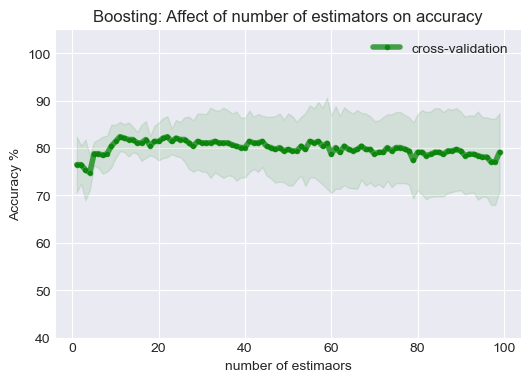

In [47]:
plt.figure(figsize=(6,4))
plt.title("Boosting: Affect of number of estimators on accuracy")
ax = plt.gca()
ax.set_ylim([40, 105])
plt.plot(n_estimators, cv_mean, marker='.', color='green', linewidth=4, alpha=0.7, label="cross-validation")
plt.fill_between(n_estimators,cv_mean-cv_std,cv_mean+cv_std,alpha=0.1, color="g")
plt.legend(loc='best')
plt.xlabel('number of estimaors')
plt.ylabel('Accuracy %')
plt.savefig(save_folder+ "Boosting number of estimators.png")

In [49]:
test_acc_boost_lr= []
train_acc_boost_lr = []
lrs = [0.01,0.1,1.0,10,30]
cv_mean,cv_std = np.zeros(len(lrs)),np.zeros(len(lrs))
for i,lr in enumerate(lrs):
    adabost = AdaBoostClassifier(learning_rate=lr,n_estimators=25, random_state=102)
    cv_result = cross_val_score(adabost,X,y.squeeze(1)) # uses R^2 as score
    cv_mean[i] = round(cv_result.mean()*100,1)
    cv_std[i] = round(cv_result.std()*100,1)
#     adabost.fit(X_train,y_train.squeeze(1))
#     # predicting the values
#     y_pred_train = adabost.predict(X_train)
#     y_pred = adabost.predict(X_test)
#     cv_result = cross_val_score(adabost,X,y.squeeze(1)) # uses R^2 as score 
#     # printing the test accuracy
#     accuracy_train = accuracy_score(y_train, y_pred_train)
#     accuracy_test = accuracy_score(y_test, y_pred)
#     train_acc_boost_lr.append(round(100*accuracy_train,0))
#     test_acc_boost_lr.append(round(100*cv_result.mean(),0))

# print("n_estimators used: ",lrs)
# print("The train accuracies score of Boosting is ", train_acc_boost_lr)
# print("The test accuracies score of Boosting is ", test_acc_boost_lr)

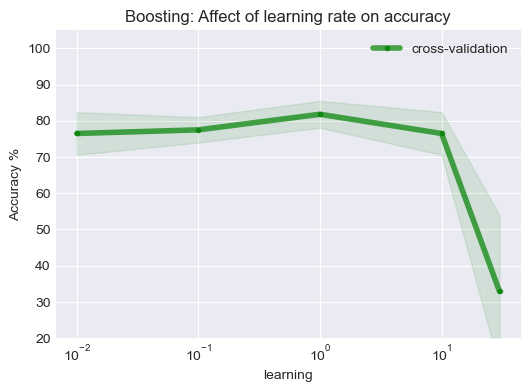

In [50]:
plt.figure(figsize=(6,4))
plt.title("Boosting: Affect of learning rate on accuracy")
ax = plt.gca()
ax.set_ylim([20, 105])
ax.set_xscale('log')
plt.plot(lrs, cv_mean, marker='.', color='green', linewidth=4, alpha=0.7, label="cross-validation")
plt.fill_between(lrs,cv_mean-cv_std,cv_mean+cv_std,alpha=0.1, color="g")
plt.legend(loc='best')
plt.xlabel('learning')
plt.ylabel('Accuracy %')
# plt.show()
plt.savefig(save_folder+ "Boosting learning rate.png")

## KNN

In [51]:
# param_grid = {'n_neighbors': np.arange(1,20),
#               'weights': ['uniform','distance'],
#               'algorithm':['auto','ball_tree','kd_tree','brute'],
#               'leaf_size':[5,10,15,20,30,50,100]
#              } 
# grid_knn = GridSearchCV( KNeighborsClassifier(), param_grid, refit = True, verbose = 3,cv=6,
#                            scoring='accuracy',n_jobs=-1)
  
# # fitting the model for grid search
# grid_knn.fit(X_train, y_train.squeeze(1))
# print("Best parameters set found on development set:")
# print(grid_knn.best_params_)

In [52]:
# print(grid_knn.best_params_)
# grid_knn.best_score_

838 µs ± 12 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
47.3 ms ± 540 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
The train accuracy score of DT is  0.8257261410788381
The test accuracy score of DT is  0.8852459016393442
0.7977595628415302
0.7977595628415302
0.047263937430357686


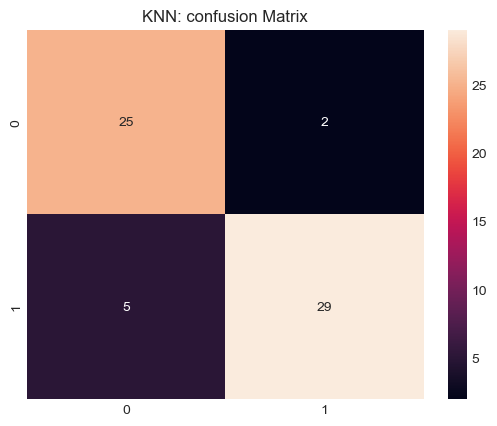

In [53]:
knn = KNeighborsClassifier(algorithm='auto',leaf_size=5,n_neighbors=7,weights='uniform')
# knn = KNeighborsClassifier(algorithm= 'auto', leaf_size= 5, n_neighbors= 4, weights= 'distance')

%timeit knn.fit(X_train,y_train)
# predicting the values
%timeit y_pred = knn.predict(X_test)
y_pred_train = knn.predict(X_train)
# printing the test accuracy
print("The train accuracy score of DT is ", accuracy_score(y_train, y_pred_train))
print("The test accuracy score of DT is ", accuracy_score(y_test, y_pred))

# print("number of patients that had heart attach cases in the test dataset: ",len(np.where(y_test==1)[0]))
# print("number of patients that didn't had  cases in the test dataset: ",len(np.where(y_test==0)[0]))
confusion = sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
confusion.set_title("KNN: confusion Matrix")
fig = confusion.get_figure()
fig.savefig(save_folder+"KNN_confusion.png")
cv_result = cross_val_score(knn,X,y.squeeze(1),cv=5) # uses R^2 as score 
print(cv_result.mean())
print(cv_result.mean())
print(cv_result.std())

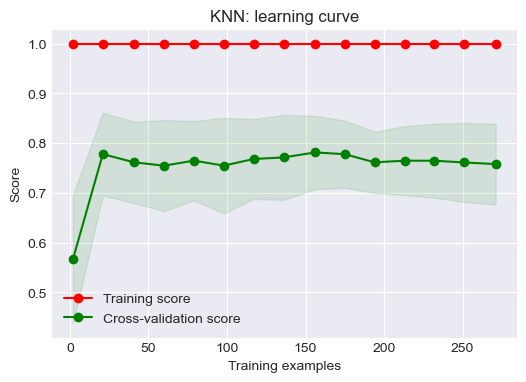

In [55]:
knn = KNeighborsClassifier(n_neighbors=1)
title = 'KNN: learning curve'
plot_learning_curve(knn,title,X,y.squeeze(1),cv=10)
# plt.show()
plt.savefig(save_folder+ "KNN learning curve.png")

In [ ]:

n_neighbors = np.arange(1,100)
# test_acc_knn_n_neighbors= np.zeros(len(n_neighbors))
# train_acc_knn_n_neighbors = np.zeros(len(n_neighbors))
algorithms = ['auto','ball_tree','kd_tree','brute']
cv_mean ,cv_std = np.zeros((len(algorithms),len(n_neighbors))),np.zeros((len(algorithms),len(n_neighbors)))
for i,algorithm in enumerate(algorithms):
    for j, n_neighbor in enumerate(n_neighbors):
        knn = KNeighborsClassifier(algorithm=algorithm,n_neighbors=n_neighbor,weights='distance')
        cv_result = cross_val_score(knn,X,y.squeeze(1)) # uses R^2 as score
        cv_mean[i,j] = round(cv_result.mean()*100,1)
        cv_std[i,j] = round(cv_result.std()*100,1)
#     knn.fit(X_train,y_train.squeeze(1))
#     # predicting the values
#     y_pred_train = knn.predict(X_train)
#     y_pred = knn.predict(X_test)
#     cv_result = cross_val_score(knn,X,y.squeeze(1)) # uses R^2 as score 
#     # printing the test accuracy
#     accuracy_train = accuracy_score(y_train, y_pred_train)
#     accuracy_test = accuracy_score(y_test, y_pred)
#     train_acc_knn_n_neighbors[i] = round(100*accuracy_train,0)
#     test_acc_knn_n_neighbors[i] =round(100*cv_result.mean(),0)
#     stds[i] = round(100*cv_result.std(),1)
# print("n_estimators used: ",n_neighbors)
# print("The train accuracies score of Boosting is ", train_acc_knn_n_neighbors)
# print("The test accuracies score of Boosting is ", test_acc_knn_n_neighbors)

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(n_neighbors, cv_mean[0], marker='.', color='green', linewidth=4, alpha=0.7, label="auto")
plt.fill_between(n_neighbors,cv_mean[0]-cv_std[0],cv_mean[0]+cv_std[0],alpha=0.1, color="g")
plt.plot(n_neighbors, cv_mean[1], marker='.', color='blue', linewidth=4, alpha=0.7, label="ball_tree")
plt.fill_between(n_neighbors,cv_mean[1]-cv_std[1],cv_mean[1]+cv_std[1],alpha=0.1, color="b")
plt.plot(n_neighbors, cv_mean[2], marker='.', color='red', linewidth=4, alpha=0.7, label="kd_tree")
plt.fill_between(n_neighbors,cv_mean[2]-cv_std[2],cv_mean[2]+cv_std[2],alpha=0.1, color="r")
plt.plot(n_neighbors, cv_mean[3], marker='.', color='black', linewidth=4, alpha=0.7, label="brute")
plt.fill_between(n_neighbors,cv_mean[3]-cv_std[3],cv_mean[3]+cv_std[3],alpha=0.1, color="black")

plt.title("KNN: Affect of number of neighbors on accuracy")
ax = plt.gca()
ax.set_ylim([50, 90])
plt.legend(loc='best')
plt.xlabel('number neighbors')
plt.ylabel('Cross-validation %')
plt.show()
plt.savefig(save_folder+ "KNN number of neighbors .png")